In [58]:
from xvla_wlr.model import XVLA, XVLAProcessor, Trainer, get_peft_model, Action, Observation

model = XVLA.from_pretrained("2toINF/X-VLA-SoftFold")
processor = XVLAProcessor.from_pretrained("2toINF/X-VLA-SoftFold", use_fast=True)

Florence2ForConditionalGeneration has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


In [2]:
model = get_peft_model(model)
model = model.to(device="cuda")
trainer = Trainer(model, processor)

In [10]:
%%timeit -n 10

trainer.fit(
    Observation.sample(),
    Action.sample()
)

155 ms ± 19.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
from xvla_wlr.model import compute_actions

compute_actions(
    model,
    processor=processor,
    observation=Observation.sample(),
)

Action(ee_transforms=Ellipsis, ee_gripper_vals=tensor([[[[0.2315],
          [0.3649]],

         [[0.2297],
          [0.3621]],

         [[0.2263],
          [0.3608]],

         [[0.2257],
          [0.3618]],

         [[0.2228],
          [0.3565]],

         [[0.2168],
          [0.3512]],

         [[0.2224],
          [0.3588]],

         [[0.2182],
          [0.3499]],

         [[0.2161],
          [0.3464]],

         [[0.2145],
          [0.3429]],

         [[0.2077],
          [0.3292]],

         [[0.2045],
          [0.3230]],

         [[0.2057],
          [0.3267]],

         [[0.2071],
          [0.3281]],

         [[0.2050],
          [0.3226]],

         [[0.1983],
          [0.3122]],

         [[0.1977],
          [0.3108]],

         [[0.1985],
          [0.3139]],

         [[0.1987],
          [0.3163]],

         [[0.1961],
          [0.3151]],

         [[0.1933],
          [0.3132]],

         [[0.1909],
          [0.3134]],

         [[0.1948],
         

In [7]:
# model.save_pretrained("", safe_serialization=True)
# processor.save_pretrained("", safe_serialization=True)

Signature:
model.save_pretrained(
    save_directory: 'str',
    safe_serialization: 'bool' = True,
    selected_adapters: 'Optional[list[str]]' = None,
    save_embedding_layers: 'Union[str, bool]' = 'auto',
    is_main_process: 'bool' = True,
    path_initial_model_for_weight_conversion: 'Optional[str]' = None,
    **kwargs: 'Any',
) -> 'None'
Docstring:
This function saves the adapter model and the adapter configuration files to a directory, so that it can be
reloaded using the [`PeftModel.from_pretrained`] class method, and also used by the [`PeftModel.push_to_hub`]
method.

Args:
    save_directory (`str`):
        Directory where the adapter model and configuration files will be saved (will be created if it does not
        exist).
    safe_serialization (`bool`, *optional*):
        Whether to save the adapter files in safetensors format, defaults to `True`.
    selected_adapters (`List[str]`,  *optional*):
        A list of adapters to be saved. If `None`, will default to all a

In [89]:
import os

from datasets_wlr import WLRZhuangEpisodeDataset
from curobo.types.robot import RobotConfig
from xvla_wlr.model import DATA_DOMAIN_ID


dataset = WLRZhuangEpisodeDataset("samples/2026-01-21_demo_clothes/episode_0/data.json")
robot_config = RobotConfig.from_basic(
    f"{os.getcwd()}/robots/piper_ros/src/piper_description/urdf/piper_description.urdf",
    base_link="base_link",
    ee_link="link8",
)
domain_id = DATA_DOMAIN_ID["robomind-agilex"]

In [ ]:
from xvla_wlr.dataset import XVLAWLRZhuangEpisodeDataset

xvla_dataset = XVLAWLRZhuangEpisodeDataset(
    dataset=dataset,
    domain_id=domain_id,
    robot_config=robot_config,
)

In [91]:
xvla_dataset[0]

Observation(text=array(['1. pick the cloth;2. fold the cloth;3. pile up the clothes'],
      dtype='<U58'), images=tensor([[[[[150, 151, 152,  ...,  41,   4,   1],
           [150, 151, 152,  ...,  34,   1,   0],
           [151, 151, 152,  ...,  27,   1,   2],
           ...,
           [ 22,  28,  32,  ...,   3,   2,   2],
           [ 24,  27,  22,  ...,   1,   3,   8],
           [ 29,  32,  23,  ...,   4,   5,   6]],

          [[169, 169, 169,  ...,  38,   1,   0],
           [169, 169, 169,  ...,  32,   1,   0],
           [170, 168, 169,  ...,  27,   0,   0],
           ...,
           [ 21,  25,  24,  ...,   0,   0,   0],
           [ 24,  26,  18,  ...,   0,   0,   0],
           [ 19,  25,  20,  ...,   0,   0,   0]],

          [[165, 167, 168,  ...,  48,   7,   0],
           [165, 167, 167,  ...,  43,   7,   0],
           [168, 166, 167,  ...,  31,   3,   1],
           ...,
           [ 20,  25,  24,  ...,   1,   1,   2],
           [ 24,  26,  18,  ...,   1,   1,   2],


In [28]:
data = dataset[0:128]

In [ ]:
# num_actions = 10
# dataset[0 + num_actions:128 + num_actions]

In [ ]:
# TODO aug should use rand choice instead of index 0
text = data["text"][..., 0]

In [ ]:
import einops
import torch
import torchvision.transforms.functional


images = einops.rearrange(
    [
        torchvision.transforms.functional.resize(torch.asarray(image), [224, 224])
        for image in [
            data["image_left"],
            data["image_front"],
            data["image_right"],
        ]
    ],
    "camera batch channel height width -> batch camera channel height width",
)
images_mask = einops.repeat(
    torch.asarray(True),
    "-> batch camera",
    **einops.parse_shape(images, "batch camera _ _ _"),
)

{'batch': 128, 'camera': 3, 'channel': 3, 'height': 224, 'width': 224}

In [30]:
import os
from curobo.wrap.reacher.ik_solver import IKSolver, IKSolverConfig
from curobo.types.robot import RobotConfig

ik_solver_config = IKSolverConfig.load_from_robot_config(
    robot_cfg=RobotConfig.from_basic(
        f"{os.getcwd()}/robots/piper_ros/src/piper_description/urdf/piper_description.urdf",
        base_link="base_link",
        ee_link="link8",
    ),
    # position_threshold=0.005,
    self_collision_check=False,
    self_collision_opt=False,
    # regularization=False,
    use_cuda_graph=True,
)

ik_solver = IKSolver(ik_solver_config)

In [ ]:
import torch
import einops


# TODO use dof_names for indexing
dof_positions_left = data["dof_positions"][..., 0:7]
dof_positions_right = data["dof_positions"][..., 7:14]


ee_transforms = [
    ik_solver.fk(
        torch.asarray(
            d[..., 0:6], 
            dtype=torch.float,
            device="cuda",
        )
    )
    .ee_pose.get_matrix()
    for d in [dof_positions_left, dof_positions_right]
]
ee_transforms = einops.rearrange(
    ee_transforms,
    "ee batch a b -> batch ee a b",
)

ee_gripper_vals = einops.rearrange(
    [
        d[..., 6]
        for d in [dof_positions_left, dof_positions_right]
    ],
    "ee batch -> batch ee",
)

In [75]:
from xvla_wlr.model import DATA_DOMAIN_ID

domain_id = einops.repeat(
    torch.asarray(DATA_DOMAIN_ID["robomind-agilex"]),
    "-> batch",
    **einops.parse_shape(text, "batch"),
)

In [ ]:
observation = Observation(
    text=text,
    images=images,
    images_mask=images_mask,
    domain_id=domain_id,
    ee_transform=ee_transforms,
    ee_gripper_val=ee_gripper_vals,
)

Observation(text=array(['1. pick the cloth;2. fold the cloth;3. pile up the clothes',
       '1. pick the cloth;2. fold the cloth;3. pile up the clothes',
       '1. pick the cloth;2. fold the cloth;3. pile up the clothes',
       '1. pick the cloth;2. fold the cloth;3. pile up the clothes',
       '1. pick the cloth;2. fold the cloth;3. pile up the clothes',
       '1. pick the cloth;2. fold the cloth;3. pile up the clothes',
       '1. pick the cloth;2. fold the cloth;3. pile up the clothes',
       '1. pick the cloth;2. fold the cloth;3. pile up the clothes',
       '1. pick the cloth;2. fold the cloth;3. pile up the clothes',
       '1. pick the cloth;2. fold the cloth;3. pile up the clothes',
       '1. pick the cloth;2. fold the cloth;3. pile up the clothes',
       '1. pick the cloth;2. fold the cloth;3. pile up the clothes',
       '1. pick the cloth;2. fold the cloth;3. pile up the clothes',
       '1. pick the cloth;2. fold the cloth;3. pile up the clothes',
       '1. pick t

In [80]:
d = data["image_right"]

In [84]:
import torchvision
import torch

d = torchvision.transforms.Resize((224, 224))(torch.asarray(d))

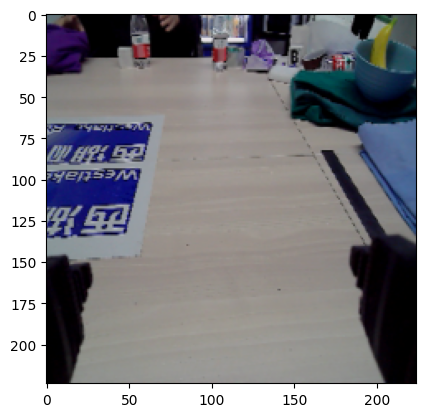

In [85]:
import einops
import matplotlib.pyplot as plt


plt.imshow(einops.rearrange(d[0], "c h w -> h w c"))